In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn-bright')

from pandas import DataFrame

import sklearn
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
#import xgboost as xgb

from scipy import stats
from scipy.stats import norm, skew
import statsmodels.formula.api as sm

import warnings
import re
warnings.filterwarnings('ignore')

%matplotlib inline

In [22]:
data = pd.read_csv('heart.csv')

In [23]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [26]:
data.sex.unique()

array([1, 0], dtype=int64)

In [27]:
data.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [28]:
data.fbs.unique()

array([1, 0], dtype=int64)

In [29]:
data.restecg.unique()

array([0, 1, 2], dtype=int64)

In [30]:
data.exng.unique()

array([0, 1], dtype=int64)

In [31]:
data.slp.unique()

array([0, 2, 1], dtype=int64)

In [32]:
data.caa.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [33]:
data.thall.unique()

array([1, 2, 3, 0], dtype=int64)

In [34]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [38]:
X,Y = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']], data[['output']]

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.33, random_state=42)

In [41]:
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2


In [55]:
#tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
#tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [91]:
tree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [92]:
predicted = tree.predict(X_test)

In [93]:
predicted

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [94]:
predicted=predicted.reshape(100,1)

In [95]:
error = abs(predicted - Y_test)

1-round(np.mean(error),2)

output    0.78
dtype: float64

In [96]:
cm = confusion_matrix(Y_test, predicted)

In [97]:
cm

array([[33,  9],
       [13, 45]], dtype=int64)

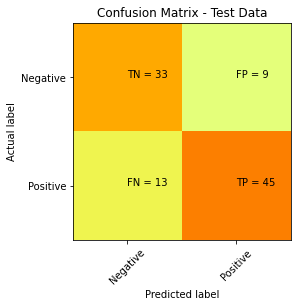

In [98]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Wistia)
classNames = ['Negative', 'Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ " = "+str(cm[i][j]))
plt.show()

In [99]:
## train
tree.fit(X_train, Y_train)
## test
predicted_prob = tree.predict_proba(X_test)[:,1]
predicted = tree.predict(X_test)

In [100]:
## Accuray e AUC
accuracy = metrics.accuracy_score(Y_test, predicted)
auc = metrics.roc_auc_score(Y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(Y_test, predicted)
precision = metrics.precision_score(Y_test, predicted)
F1_score = metrics.f1_score(Y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("F1 score :", round(F1_score,2))
print("Detail:")
print(metrics.classification_report(Y_test, predicted, target_names=[str(i) for i in np.unique(Y_test)]))

Accuracy (overall correct predictions): 0.78
Auc: 0.85
Recall (all 1s predicted right): 0.78
Precision (confidence when predicting a 1): 0.83
F1 score : 0.8
Detail:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        42
           1       0.83      0.78      0.80        58

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100

